In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

Assumes you have the csv files from https://community.lsst.org/t/survey-simulations-v1-7-release-january-2021/4660/3 .
This notebook is adapted from https://github.com/lsst-pst/survey_strategy/blob/master/fbs_1.7/Demo_SSOmetrics.ipynb

In [21]:
# import pre-made metrics dictionaries
import metric_infos as mi

# Import family dictionaries/comments 
# The information in FamilyInfo provides dictionaries to isolate each family group for easier comparison
# A demonstration of more general use of this tool is available at 
# https://github.com/lsst-pst/survey_strategy/blob/master/fbs_1.7/Demo_FamilyInfo.ipynb
import run_infos as ri



In [22]:
families = ri.FamilyInfo()
# Read the summary statistics for all runs
#families.read_summary_csv(csv_file='all_summaries_2021_02_09.csv')
families.read_summary_csv(csv_file='all_summaries_2021_04_07.csv')
family_list = families.list_of_families()

/Users/mschwamb/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (5942) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


**visit_time**, with 3 simulations.<br>**u_long**, with 5 simulations.<br>**intranight**, with 9 simulations.<br>**pair_times**, with 6 simulations.<br>**twilight_pairs**, with 5 simulations.<br>**wfd_depth**, with 17 simulations.<br>**filter_dist**, with 8 simulations.<br>**footprint**, with 19 simulations.<br>**footprint_tune**, with 10 simulations.<br>**filter_cadence**, with 7 simulations.<br>**alt_rolling**, with 3 simulations.<br>**rolling**, with 25 simulations.<br>**twilight_neo**, with 8 simulations.<br>**shortexp**, with 5 simulations.<br>**dcr**, with 7 simulations.<br>**good_seeing**, with 6 simulations.<br>**spiders**, with 2 simulations.<br>**ddf**, with 4 simulations.<br>**ddf_dithers**, with 9 simulations.<br>**euclid_dithers**, with 6 simulations.<br>**potential_schedulers**, with 17 simulations.<br>**new_rolling**, with 10 simulations.<br>

For 191 simulations in all.


visit_time
u_long
intranight
pair_times
twilight_pairs
wfd_depth
filter_dist


/Users/mschwamb/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


footprint
footprint_tune
filter_cadence
alt_rolling
rolling
twilight_neo
shortexp
dcr
good_seeing
spiders
ddf
ddf_dithers
euclid_dithers
potential_schedulers
new_rolling


<ipython-input-23-b370dd8d4693>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


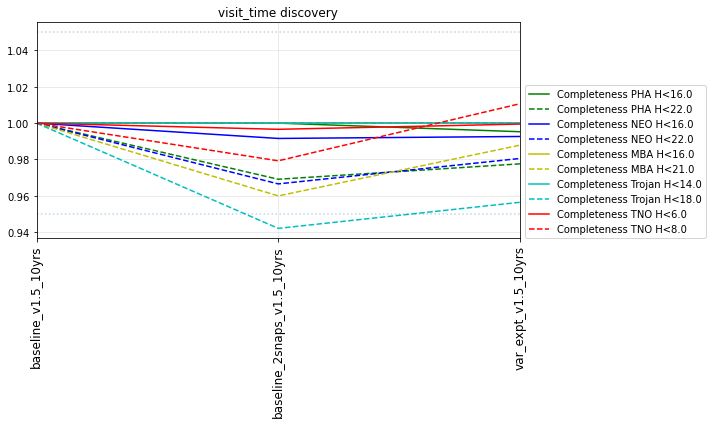

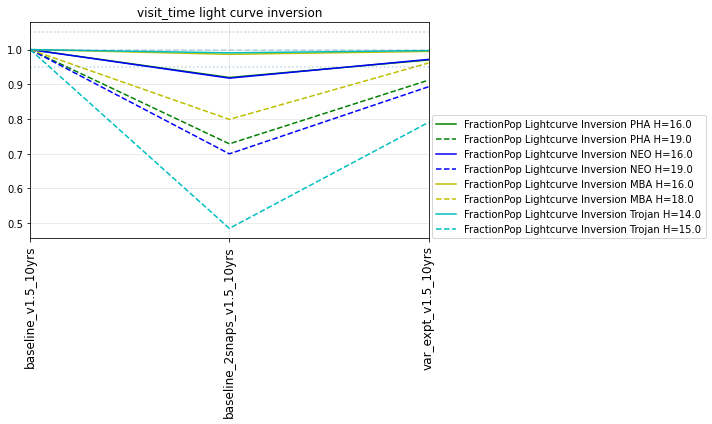

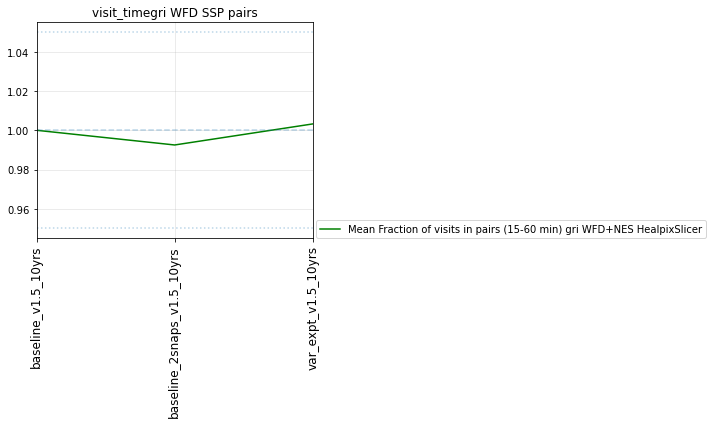

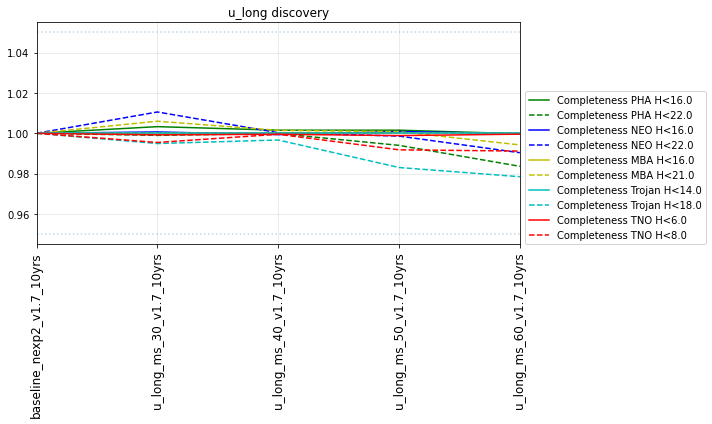

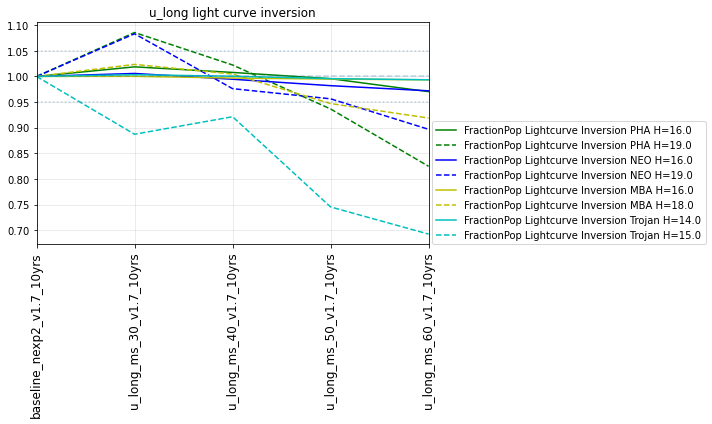

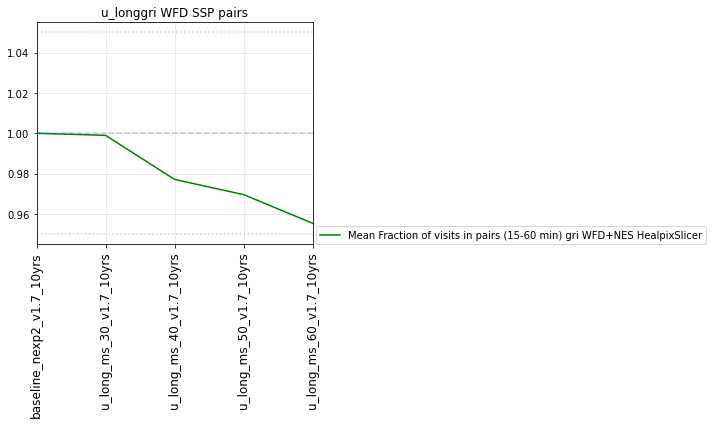

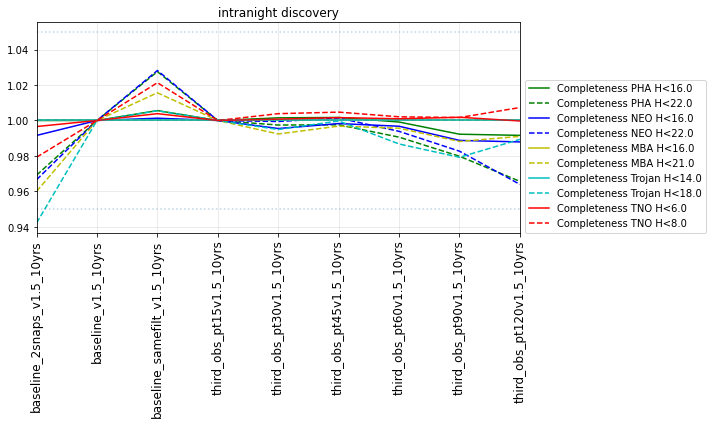

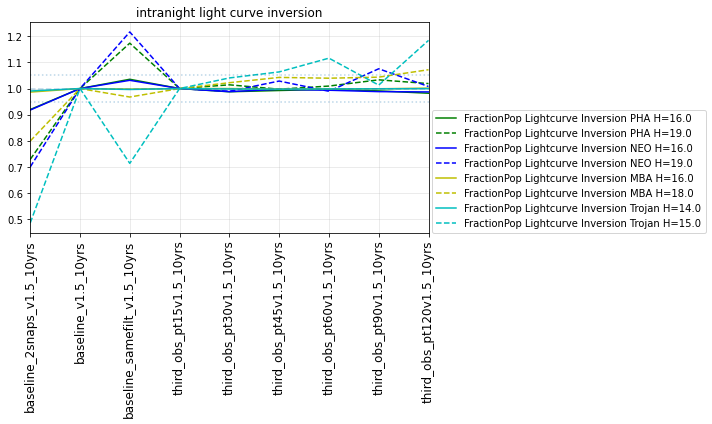

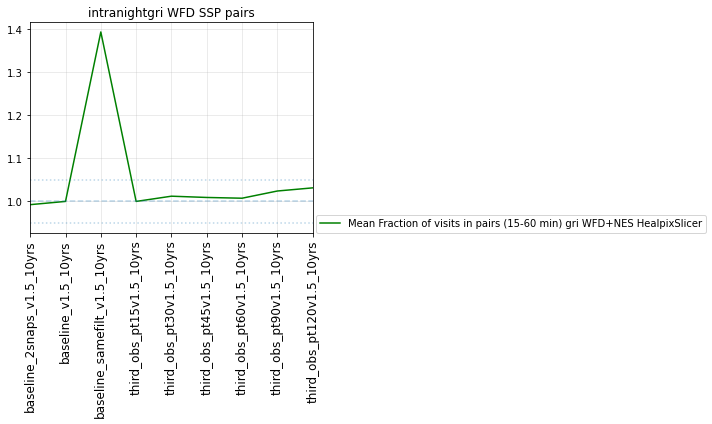

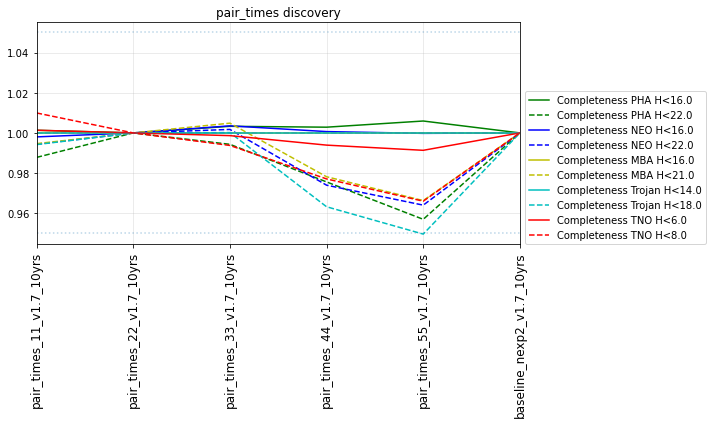

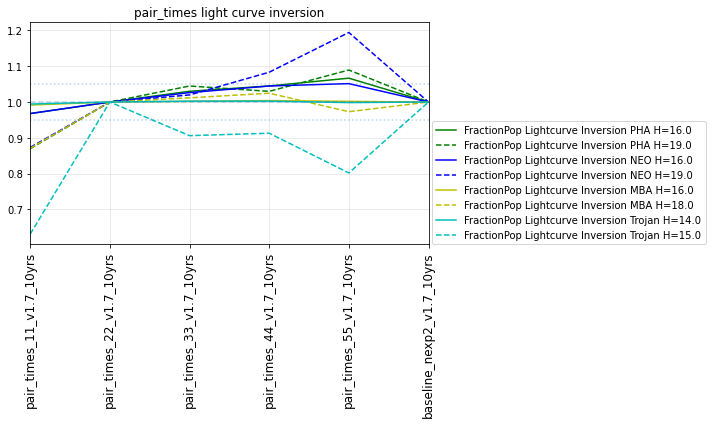

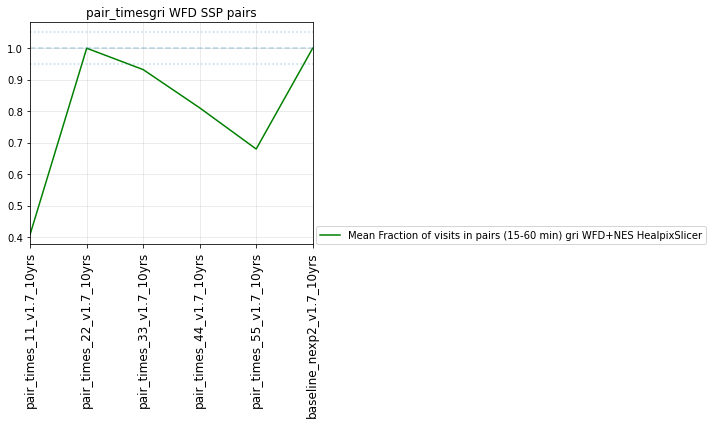

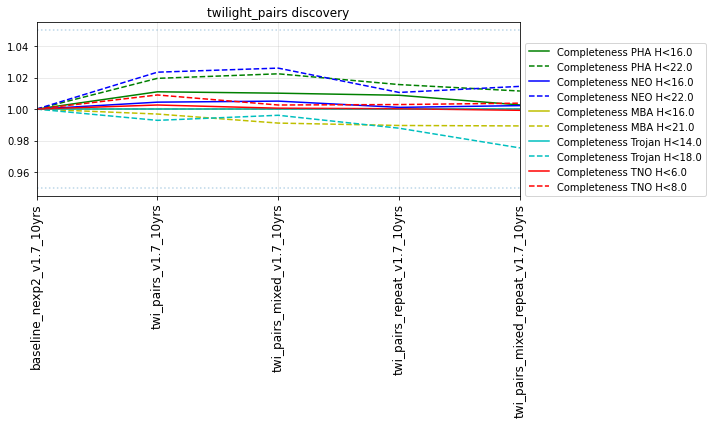

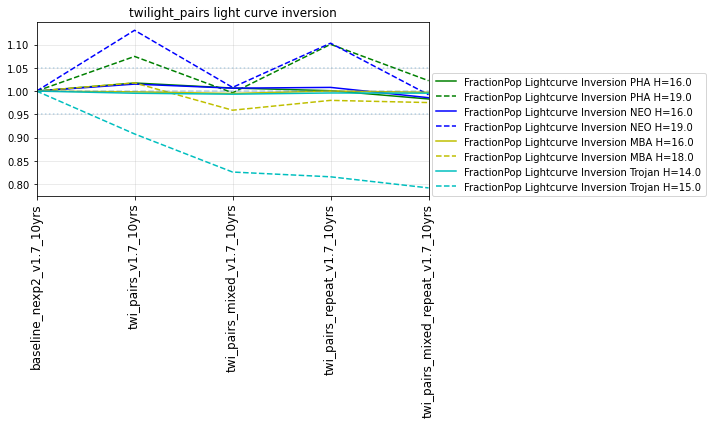

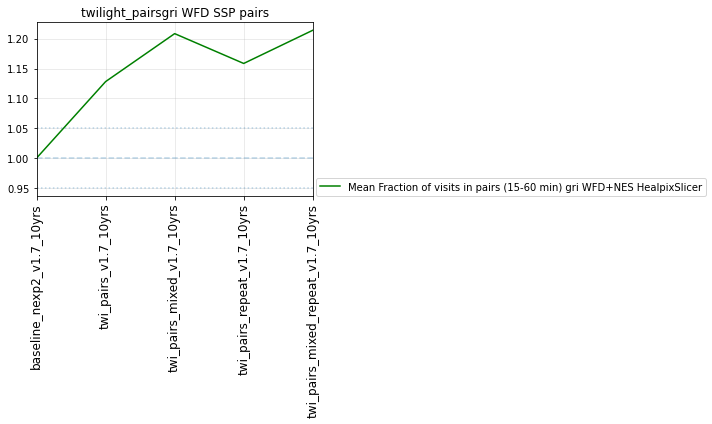

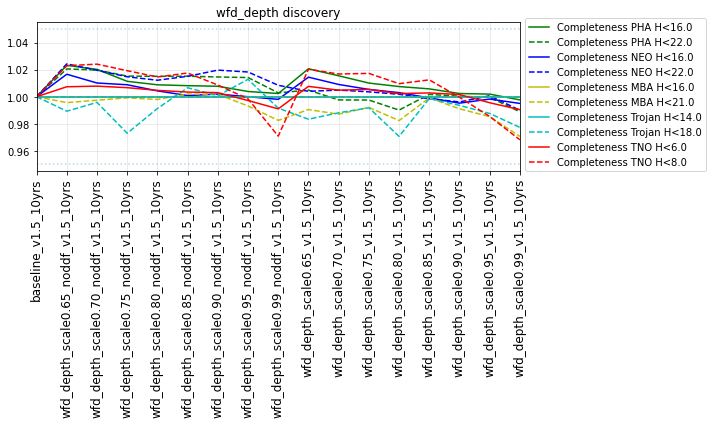

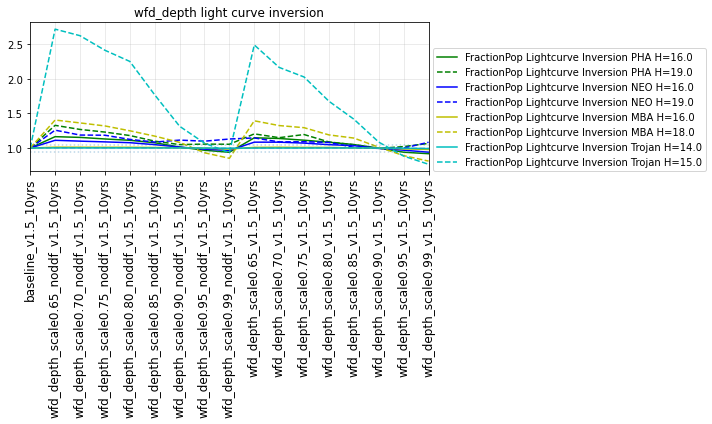

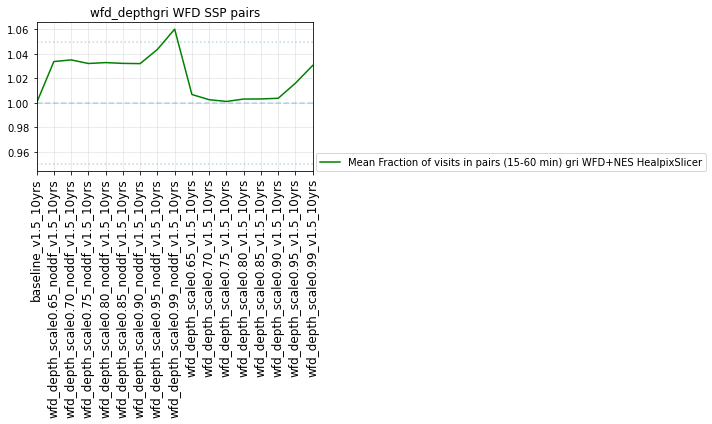

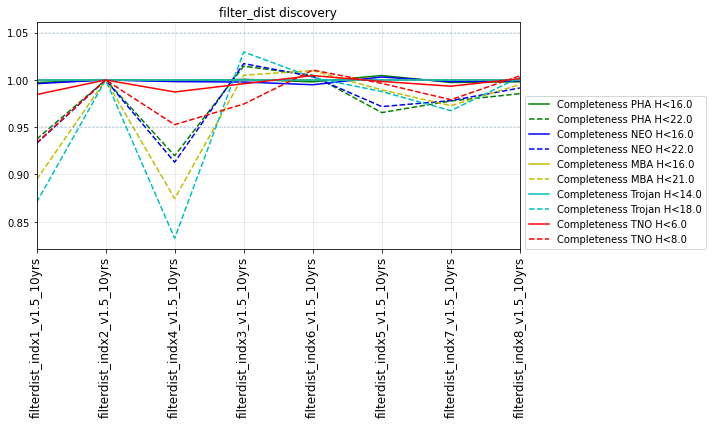

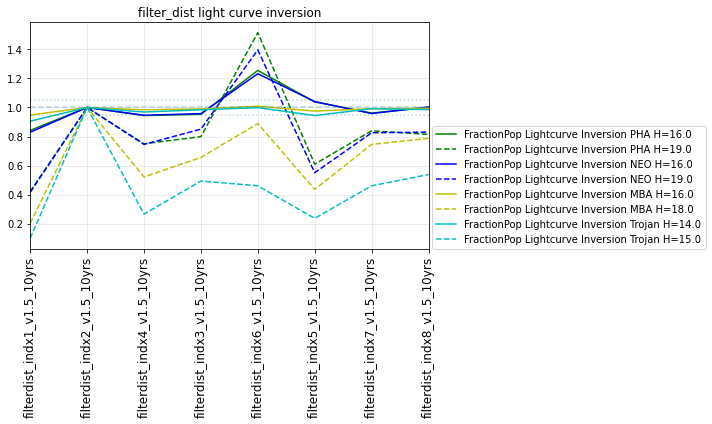

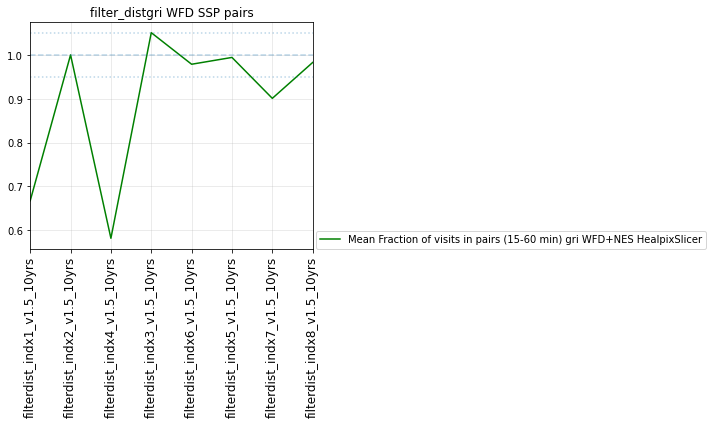

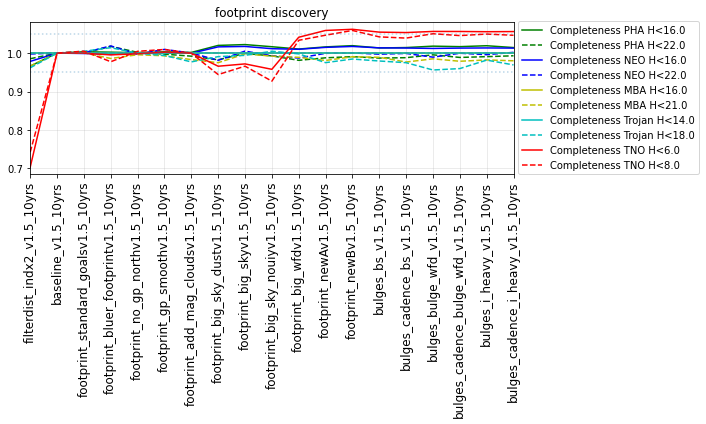

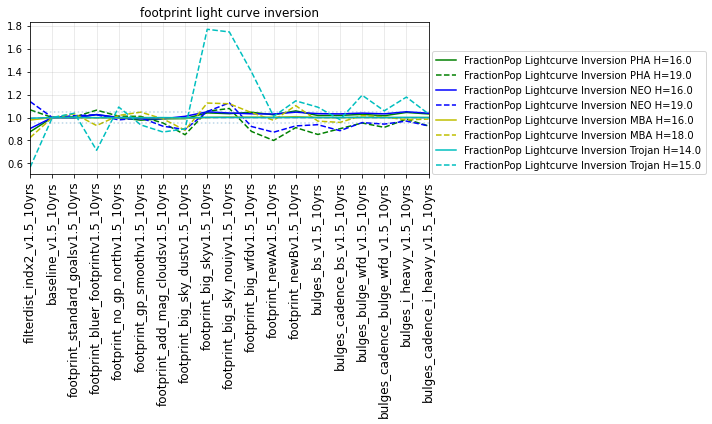

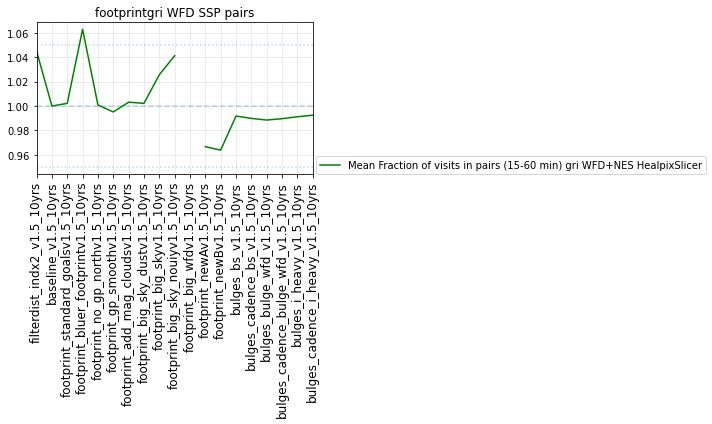

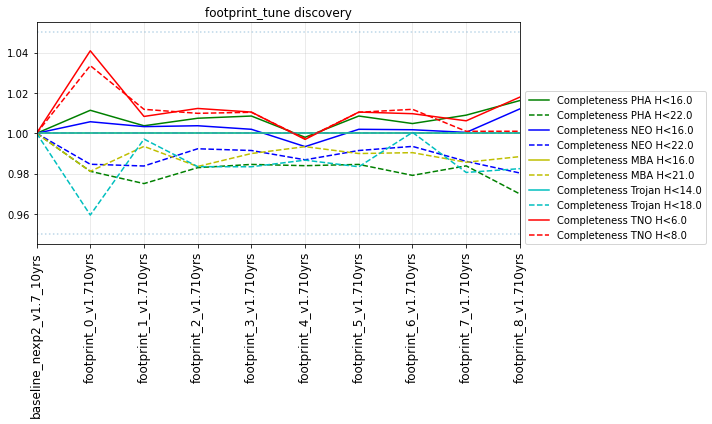

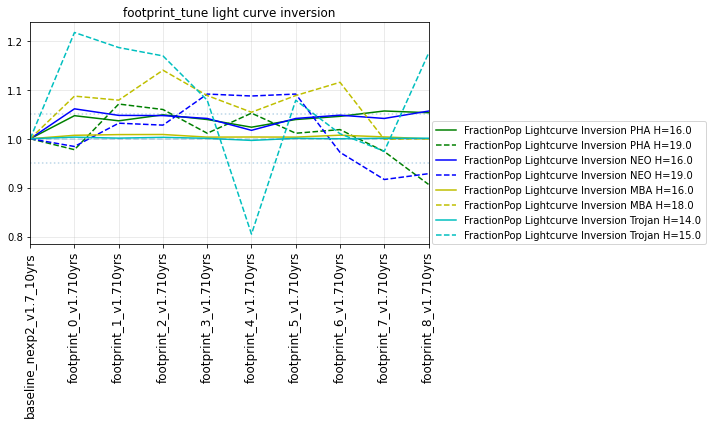

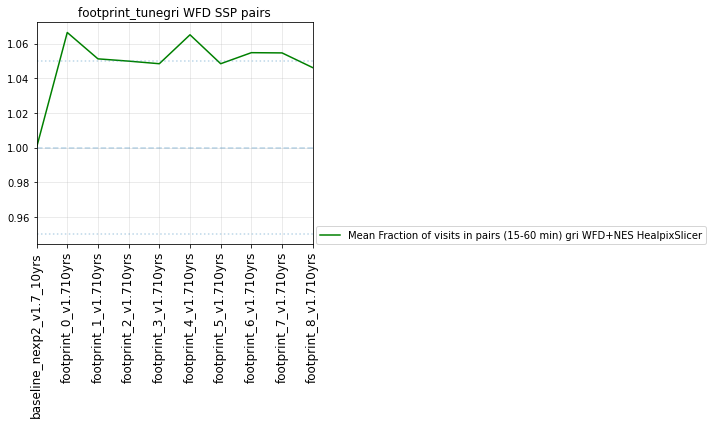

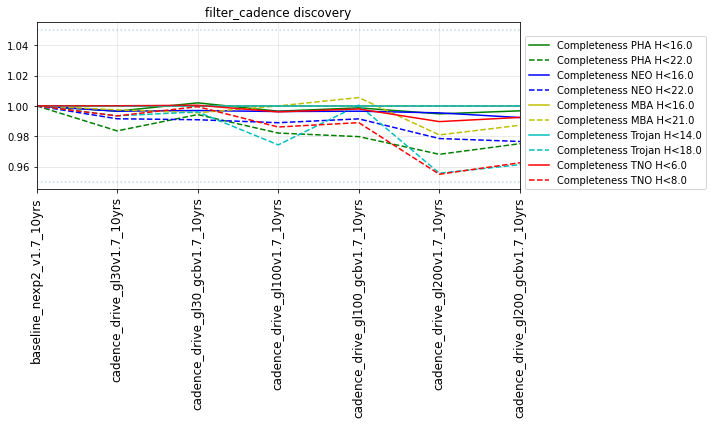

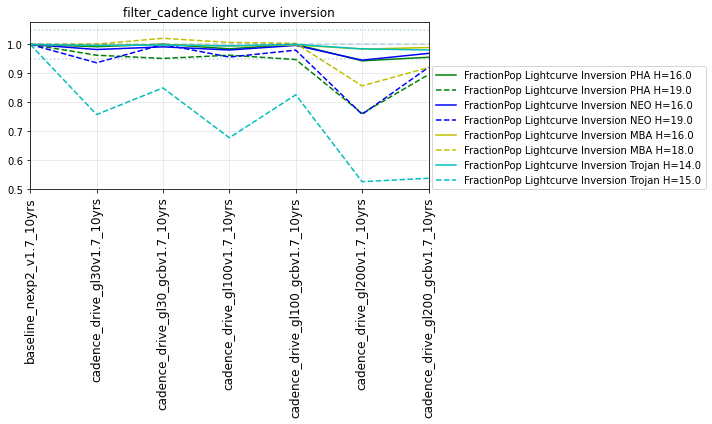

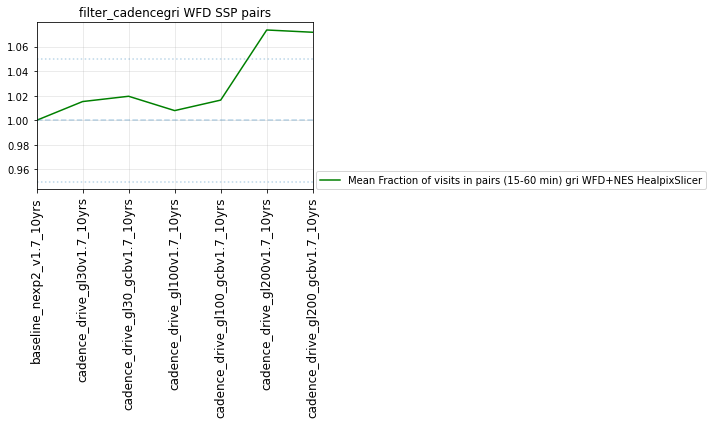

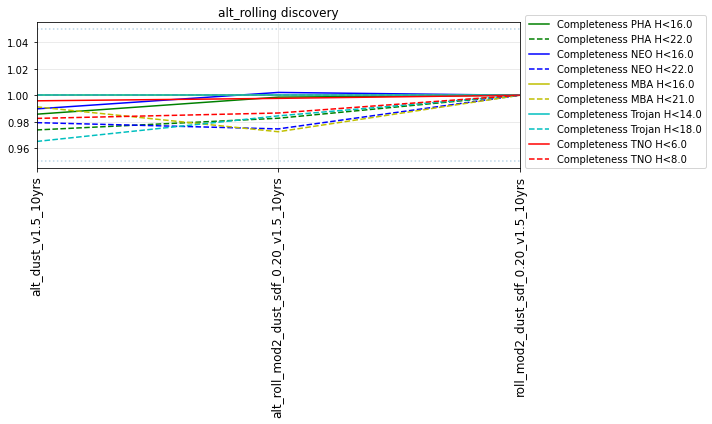

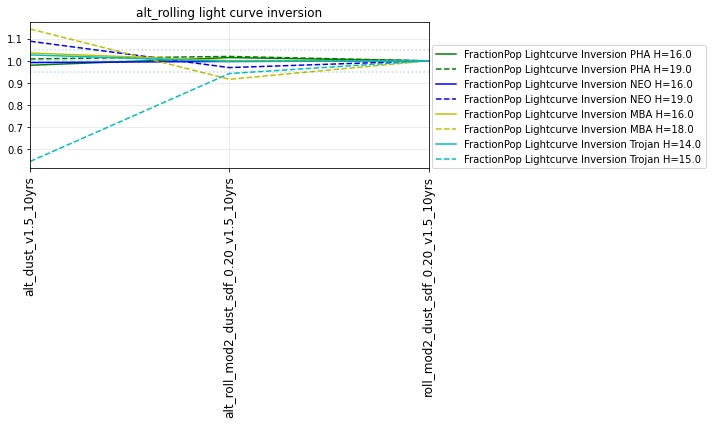

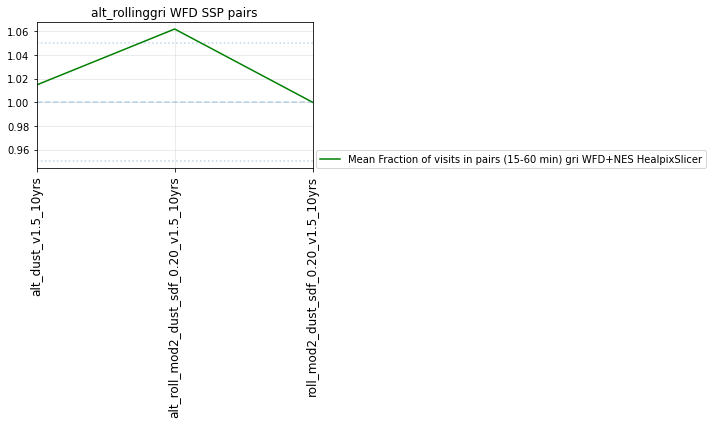

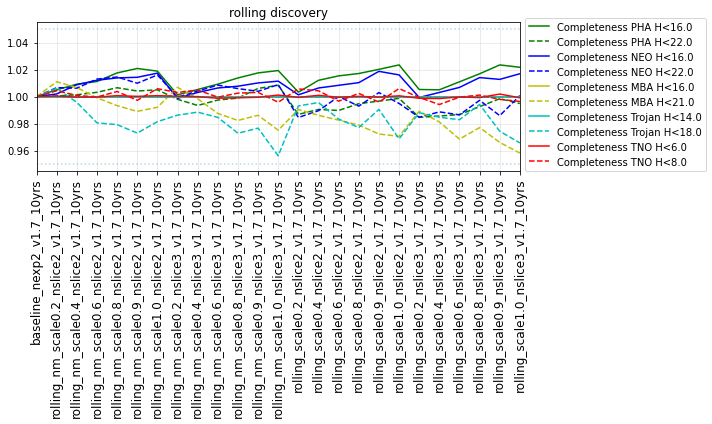

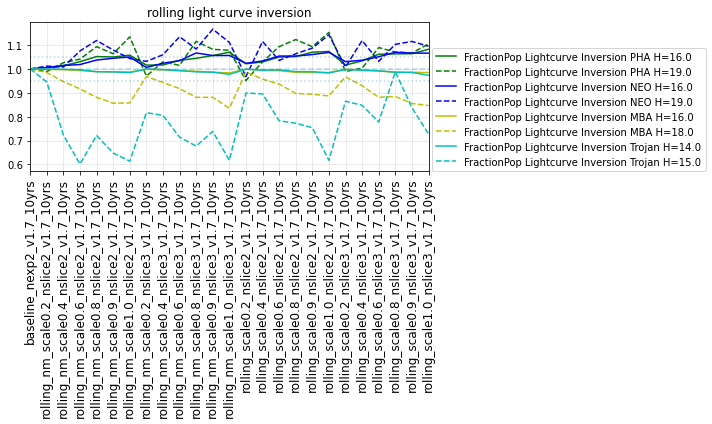

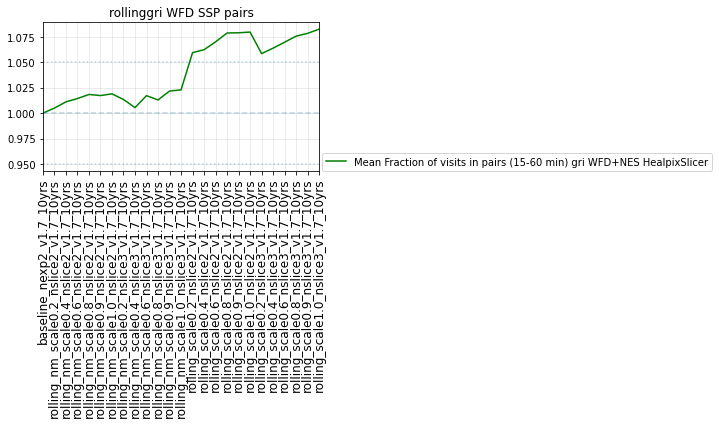

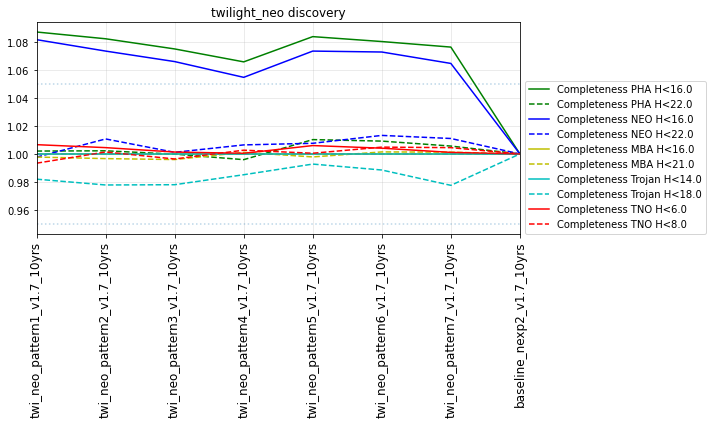

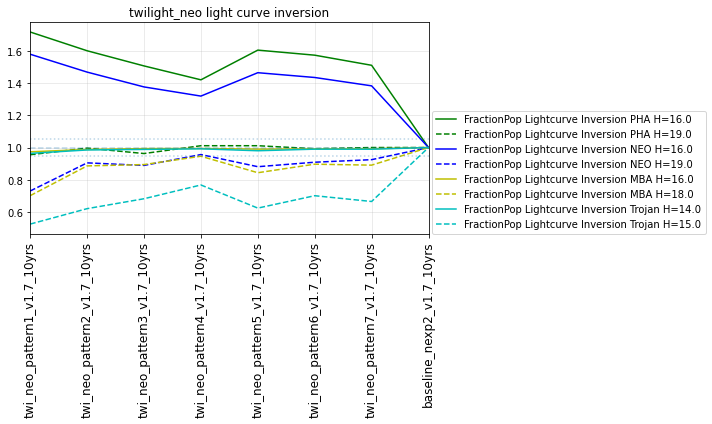

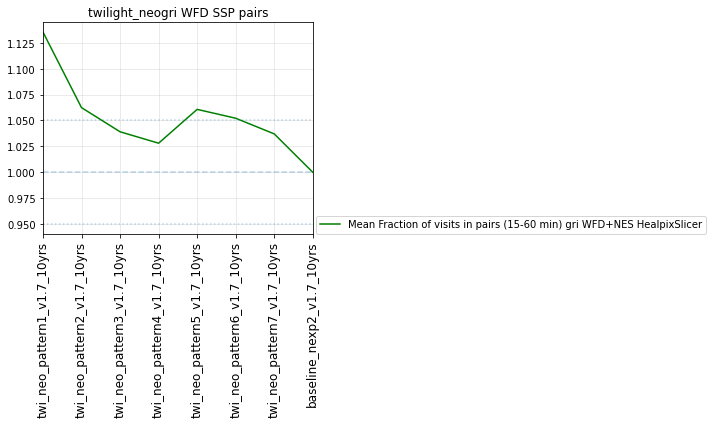

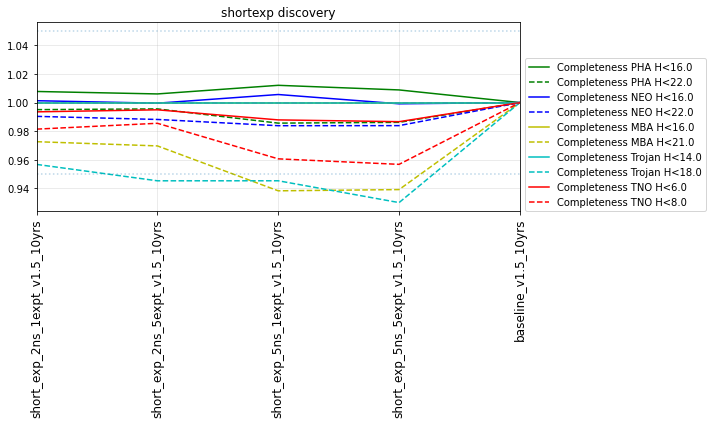

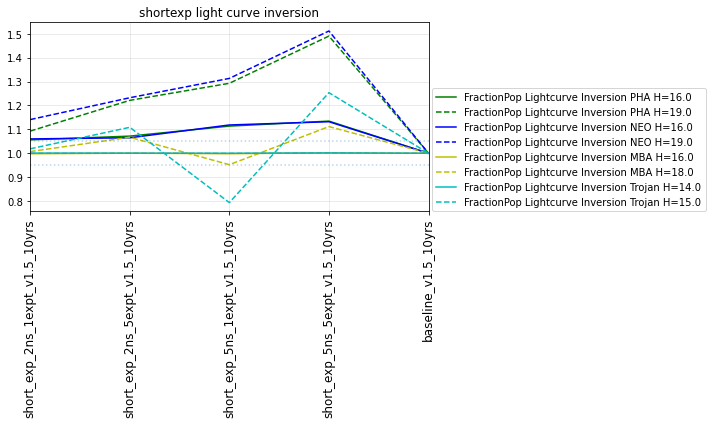

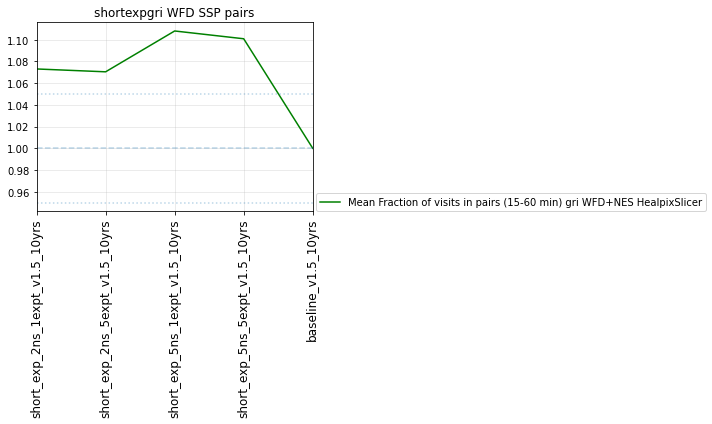

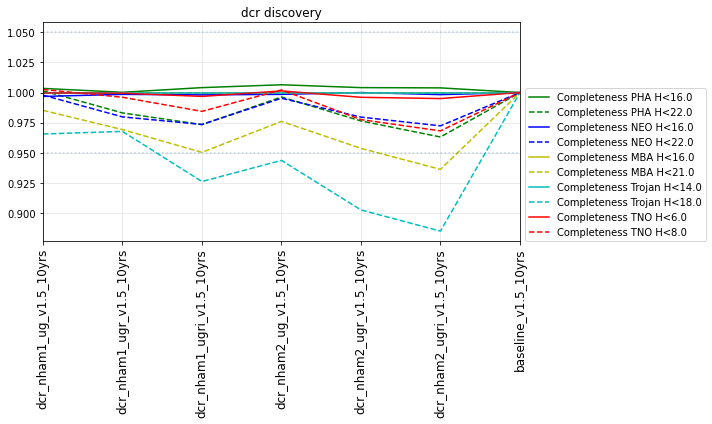

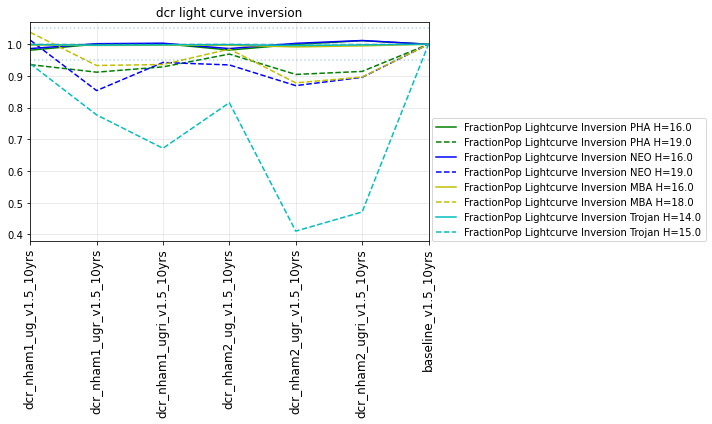

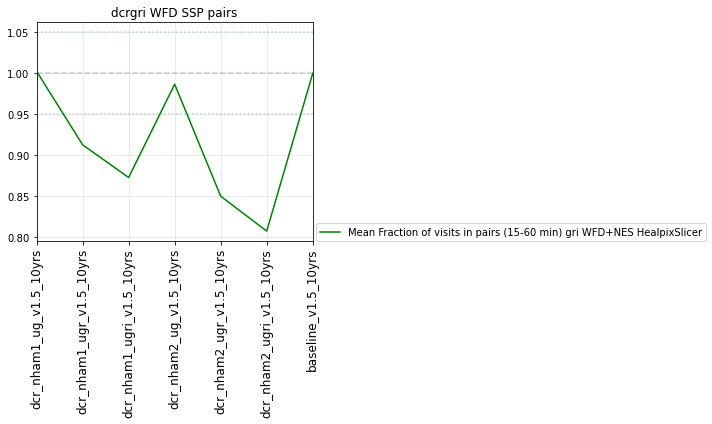

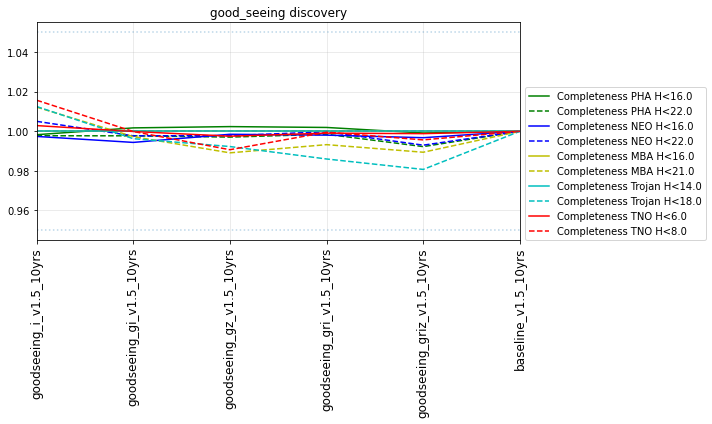

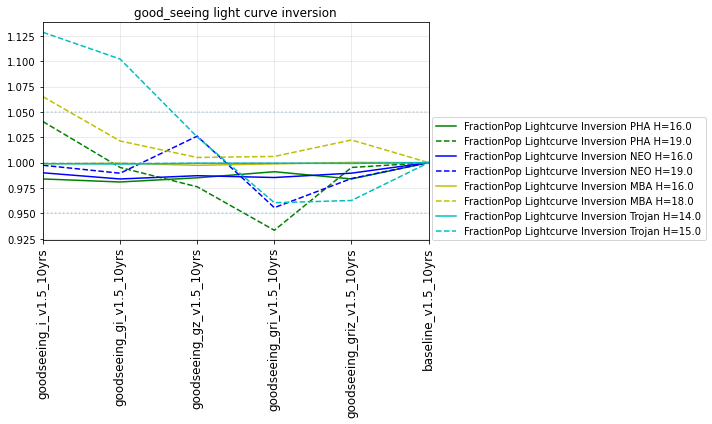

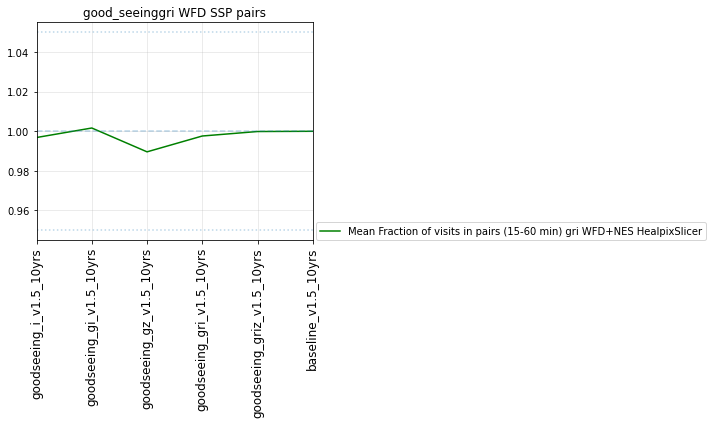

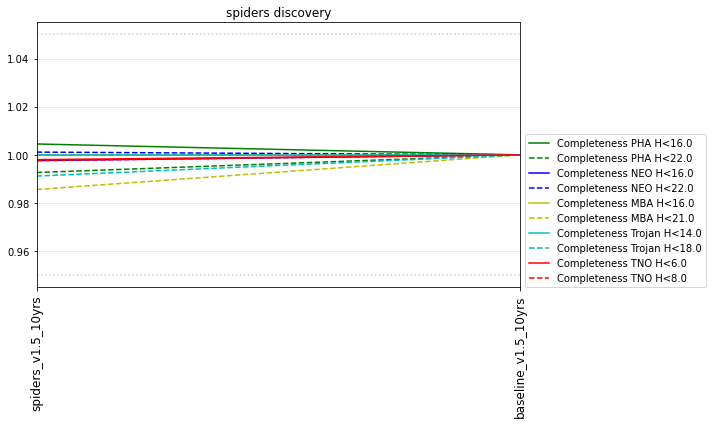

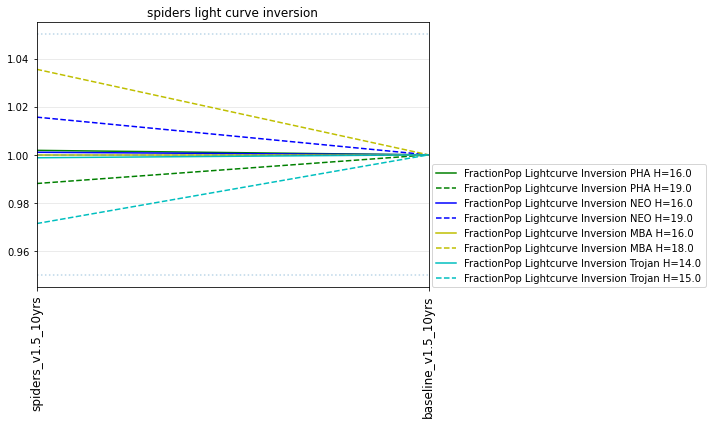

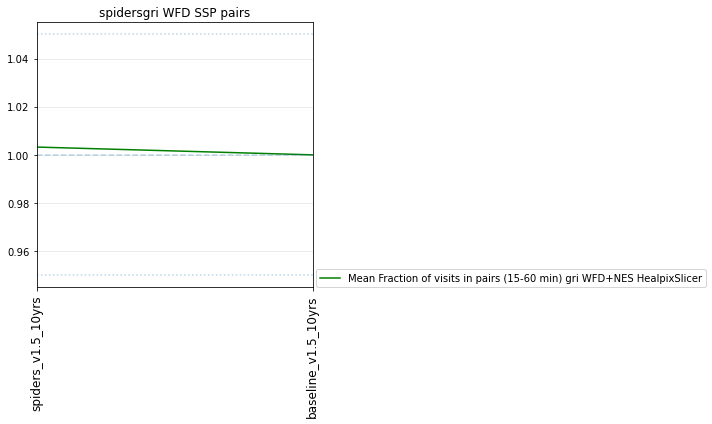

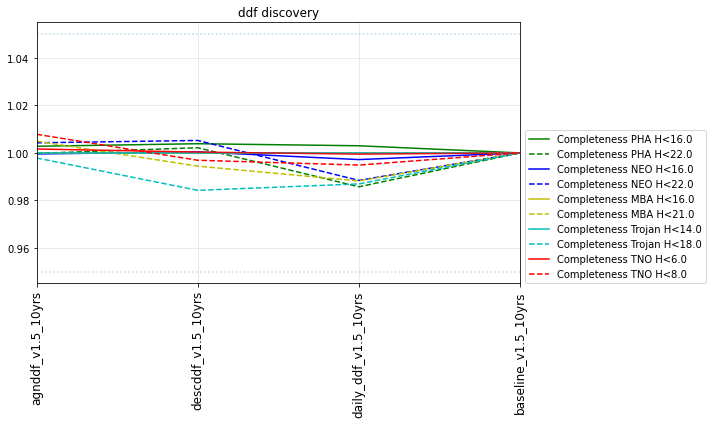

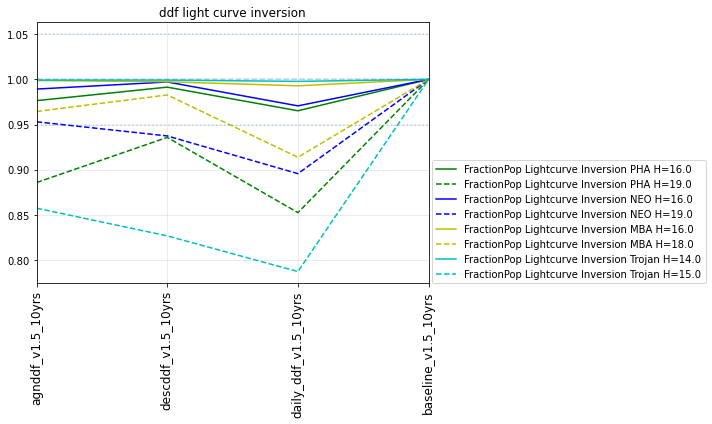

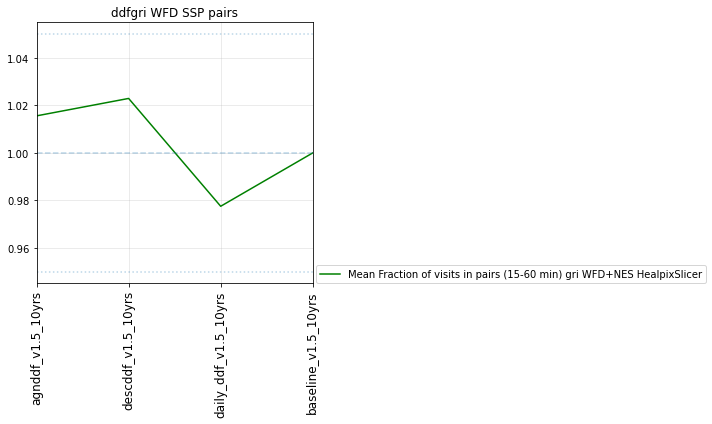

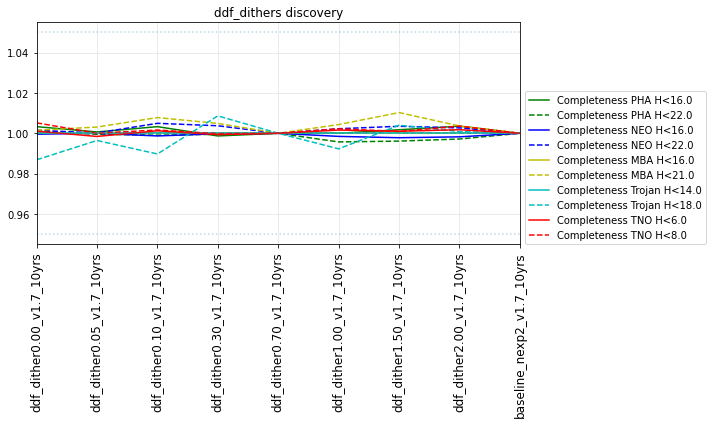

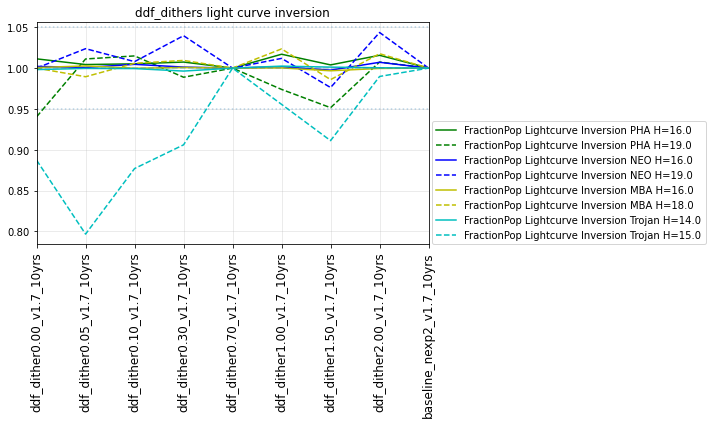

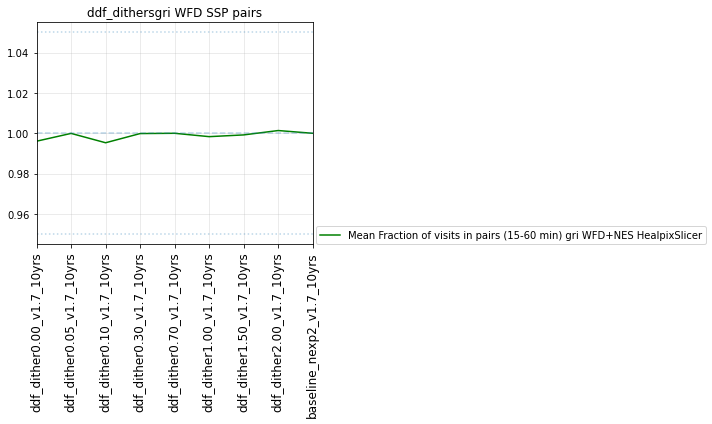

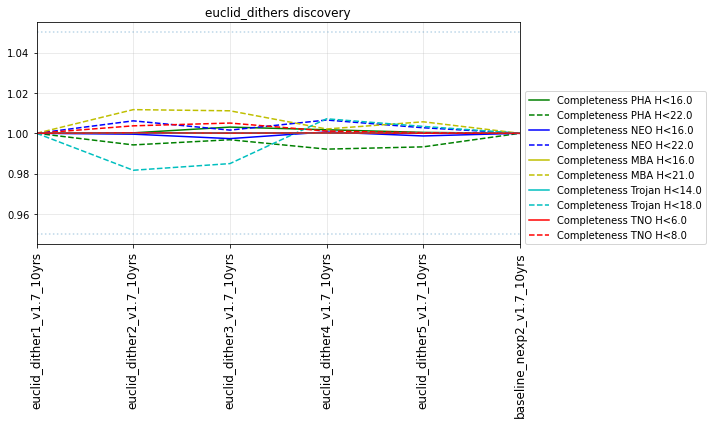

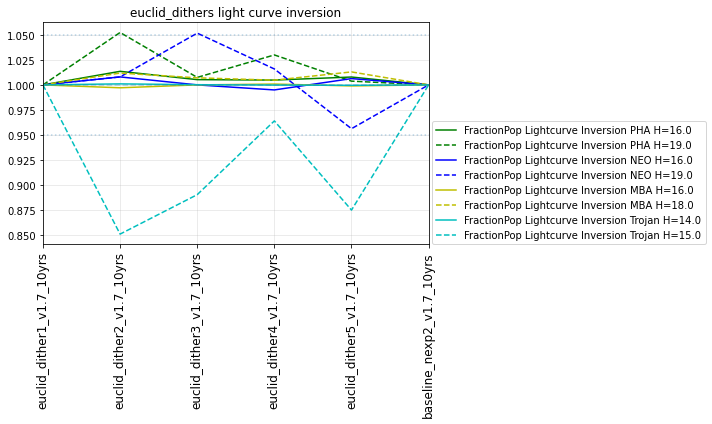

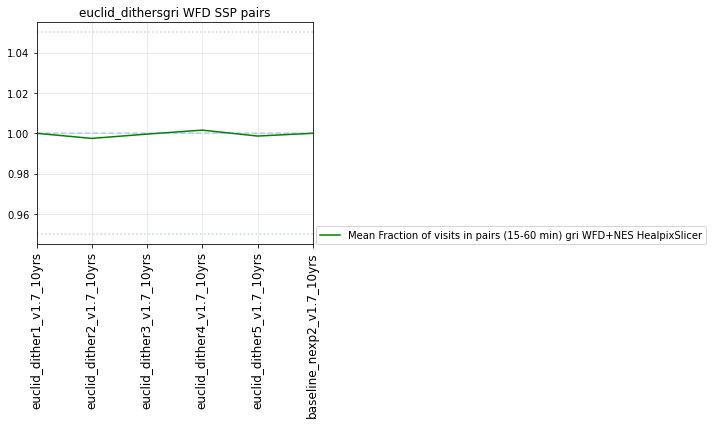

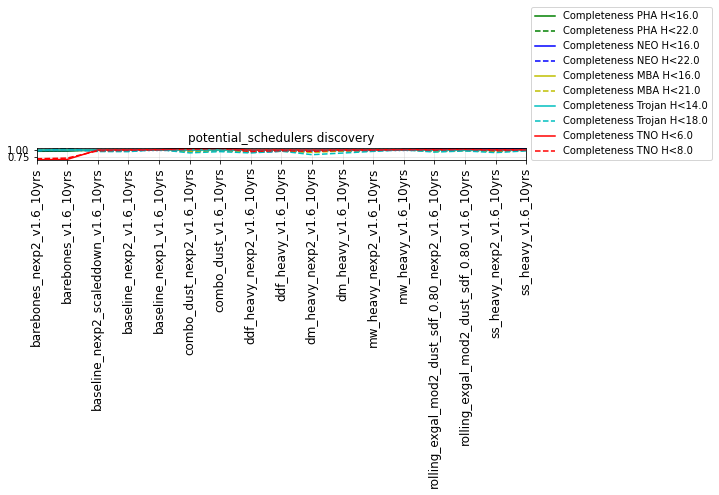

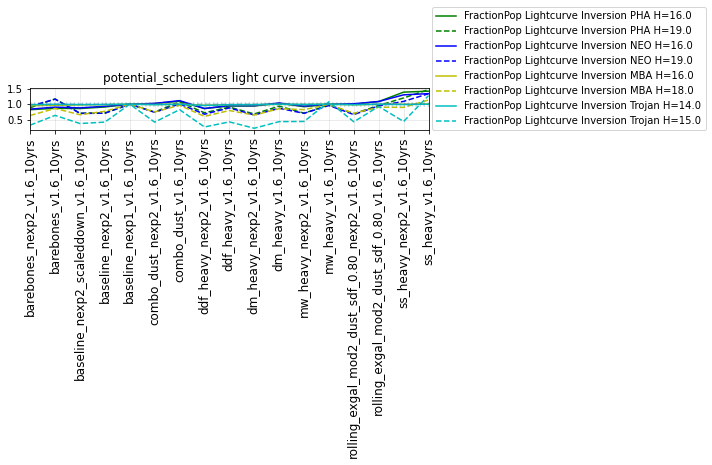

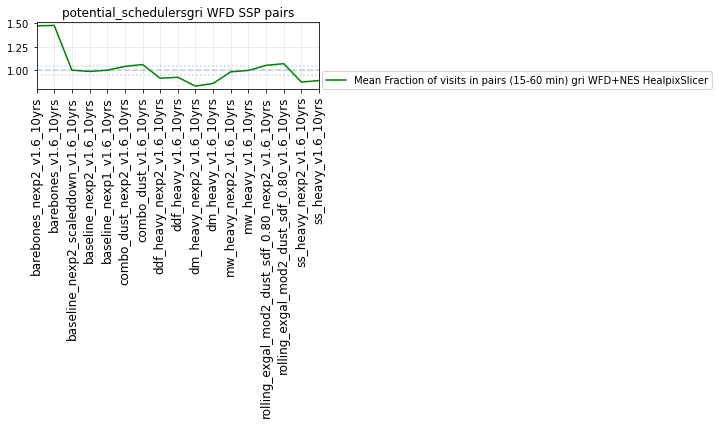

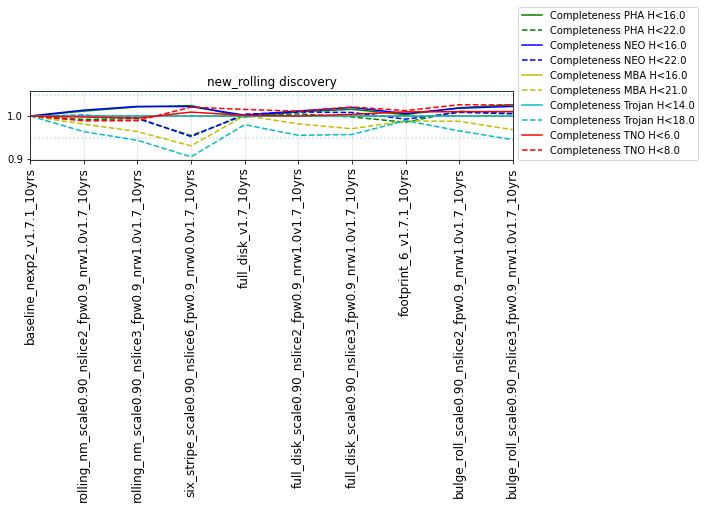

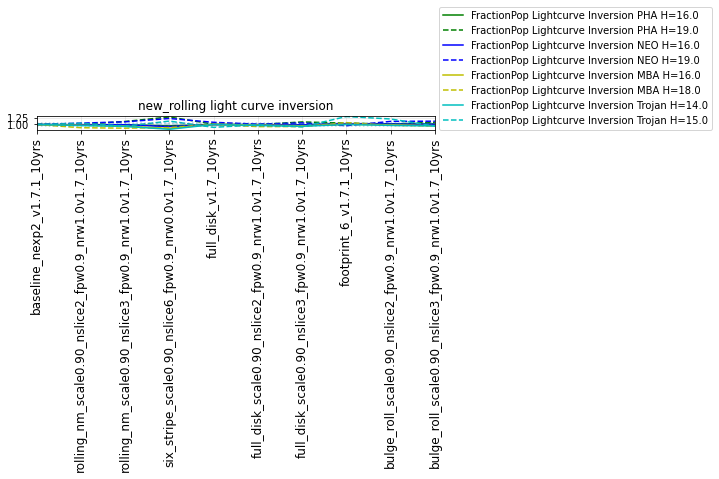

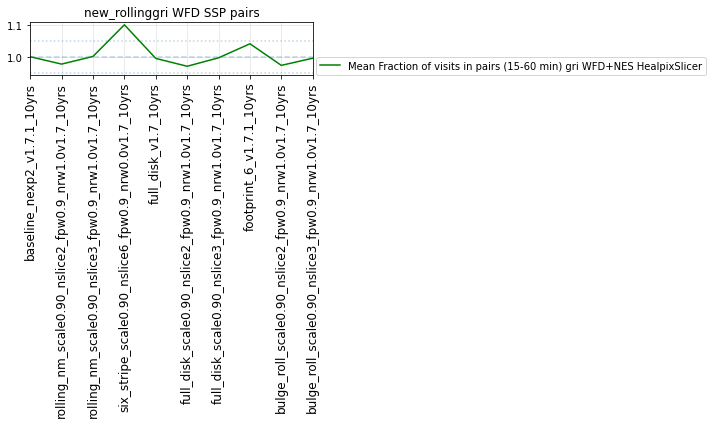

In [23]:
for f in family_list:
    with PdfPages(f+'.pdf') as pdf:
        print(f)
        comparison_run = families.family_baseline[f]
        d = families.summaries.loc[families.family[f]]
        df = d[mi.metrics['sso']]
        normdf = ri.norm_df(df, comparison_run, invert_cols=mi.invert_cols['sso'], mag_cols=mi.mag_cols['sso'])
        normdf.columns = mi.short_names_norm['sso']
        ri.plot(normdf, style=mi.styles['sso'])
 
        plt.title(f+' discovery')
        plt.tight_layout()
        pdf.savefig() 
        #plt.close('all')
    
        df = d[mi.sso_metrics['Lightcurve Inversion']]
        normdf = ri.norm_df(df, comparison_run)
        ri.plot(normdf, style=mi.styles['sso'])
        ylims = plt.ylim()
     
        plt.title(f+' light curve inversion')
        #plt.savefig(f+'_light_curve.pdf')
        plt.tight_layout()
        #plt.close('all')
        pdf.savefig() 
    
  
        metrics = ['Mean Fraction of visits in pairs (15-60 min) gri WFD+NES HealpixSlicer']
        normdf = ri.norm_df(d[metrics], comparison_run)
        ri.plot(normdf, style=mi.styles['sso'])
        plt.title(f+'gri WFD SSP pairs')
        plt.tight_layout()
        pdf.savefig() 
    


In [25]:
distance=(np.arange(45)*5)+20 #in au

distance

data = {'R':distance}
# Create DataFrame 
df = pd.DataFrame(data) 

df['on-sky-motion'] = 148.0*(1-df['R']**-0.5)/(df['R']-1)

df

nightly_pair_sep=np.array([11, 15, 18, 20, 30,44,55], dtype=int) # in minutes
colors=['MidnightBlue', 'Plum', 'DeepPink', 'Teal', 'gold', 'Grey', 'SteelBlue']


labels=np.zeros(len(nightly_pair_sep), dtype="object")

for i in np.arange(len(labels)):
    labels[i]=str(nightly_pair_sep[i])+ ' min pair separation'


labels

speed_limit=0.5/nightly_pair_sep*60.0

speed_limit

plt.plot(df['R'], df['on-sky-motion'], color='black')

for i in np.arange(len(speed_limit)):
    plt.hlines(speed_limit[i], df['R'].min() ,df['R'].max() , color=colors[i], linestyles='--', label=labels[i])
    
plt.xlim(df['R'].min() ,df['R'].max())
plt.legend()
plt.xlabel('Heliocentric Distance (au)')
plt.ylabel('On-Sky Opposition Motion (Arcseconds/hr)')
plt.savefig('on_sky_motion.pdf')
plt.close()
